In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Concatenate,Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model

## 1. AlexNet

In [2]:
alexnet = Sequential()
alexnet.add(Conv2D(filters=96, kernel_size=(11,11), strides=4, padding='valid', 
                   activation='relu', input_shape=(227,227,3))) # CONV1
alexnet.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid')) # MAX POOL1
alexnet.add(Conv2D(filters=256, kernel_size=(5,5), padding='same', activation='relu')) # CONV2
alexnet.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid')) # MAX POOL2
alexnet.add(Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu')) # CONV3
alexnet.add(Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu')) # CONV4
alexnet.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')) # CONV5
alexnet.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid')) # MAX POOL3
alexnet.add(Flatten())
alexnet.add(Dense(units=4096, activation='relu')) # FC6
alexnet.add(Dropout(0.5))
alexnet.add(Dense(units=4096, activation='relu')) # FC7
alexnet.add(Dropout(0.5))
alexnet.add(Dense(units=1000, activation='softmax')) # FC8

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

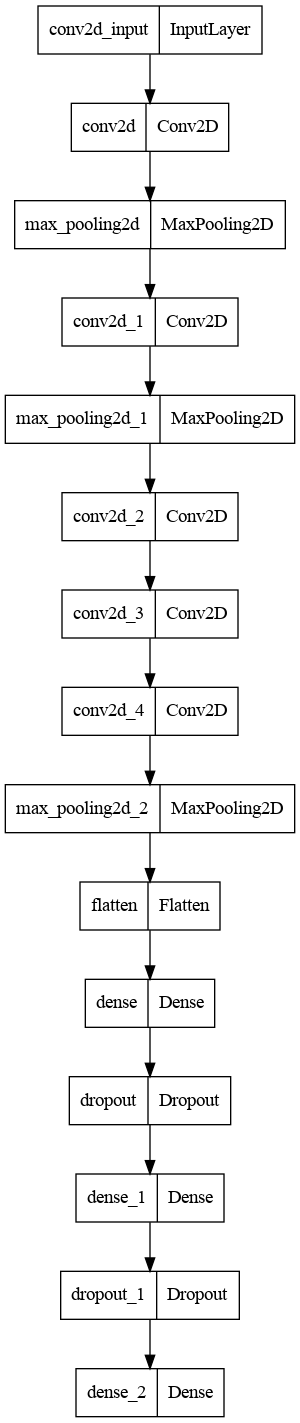

In [3]:
alexnet.summary()
plot_model(alexnet)

## 2. VGGNet (VGG16)

In [4]:
vggnet = Sequential()
# Convolutional Block 1
vggnet.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', 
                   activation='relu', input_shape=(224,224,3)))
vggnet.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
vggnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Convolutional Block 2
vggnet.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
vggnet.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
vggnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Convolutional Block 3
vggnet.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
vggnet.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
vggnet.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
vggnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Convolutional Block 4
vggnet.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
vggnet.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
vggnet.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
vggnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Convolutional Block 5
vggnet.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
vggnet.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
vggnet.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
vggnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


# Fully connected layers
vggnet.add(Flatten())
vggnet.add(Dense(units=4096, activation='relu'))
vggnet.add(Dropout(0.5))
vggnet.add(Dense(units=4096, activation='relu'))
vggnet.add(Dropout(0.5))
vggnet.add(Dense(units=1000, activation='softmax'))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

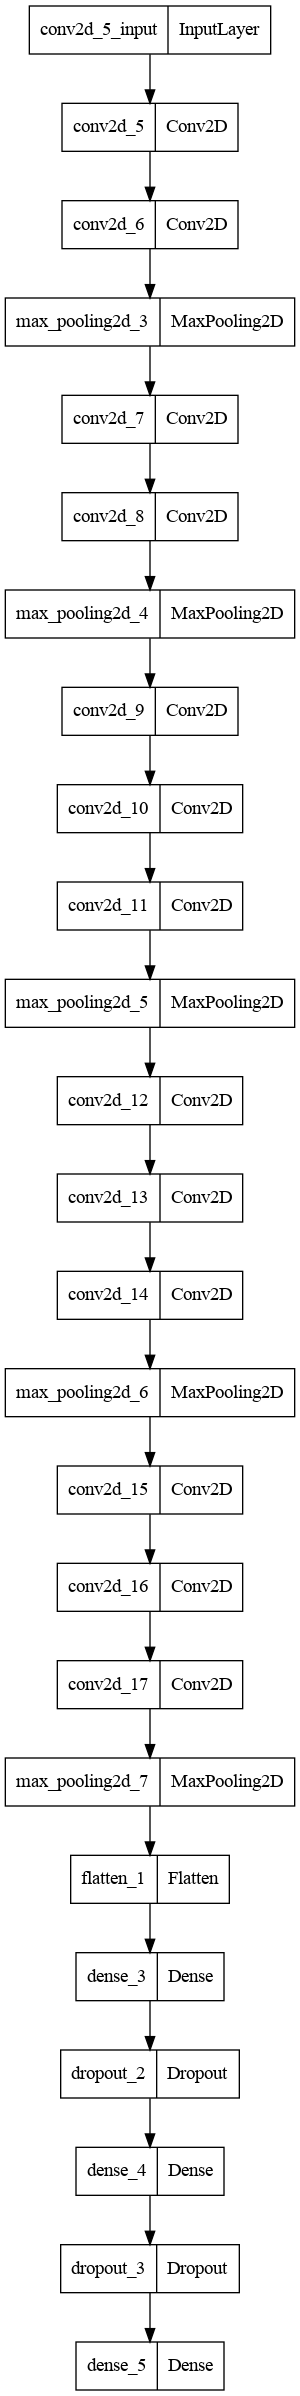

In [5]:
vggnet.summary()
plot_model(vggnet)

## 3. Inception Module of GoogLeNet

In [6]:
# Inception Module: 4개의 layer를 만들고 이를 concatenate함
def inception_module(prev, n1, n2, n3, n4):
    # n1개의 kernel(filter)을 가진 1x1 convolution layer
    o1 = Conv2D(filters=n1, kernel_size=(1,1), activation='relu')(prev)
    
    # n2[0]개의 kernel(filter)을 가진 1x1 convolution layer & n2[1]개의 kernel(filter)을 가진 3x3 cconvolution layer
    o2 = Conv2D(filters=n2[0], kernel_size=(1,1), activation='relu')(prev)
    o2 = Conv2D(filters=n2[1], kernel_size=(3,3), activation='relu', padding='same')(o2)
    
    # n3[0]개의 kernel(filter)을 가진 1x1 convolution layer & n3[1]개의 kernel(filter)을 가진 5x5 cconvolution layer
    o3 = Conv2D(filters=n3[0], kernel_size=(1,1), activation='relu')(prev)
    o3 = Conv2D(filters=n3[1], kernel_size=(5,5), activation='relu', padding='same')(o3)
    
    # 3x3 poolsize, stride 1의 maxpooling layer & n4개의 kernel(filter)을 가진 1x1 convolution layer
    o4 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(prev)
    o4 = Conv2D(filters=n4, kernel_size=(1,1), activation='relu')(o4)
    
    # 4개 layer를 concatenate
    output = Concatenate()([o1, o2, o3, o4])

    return output

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 prev (InputLayer)              [(None, 28, 28, 256  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 28, 28, 64)   16448       ['prev[0][0]']                   
                                                                                                  
 conv2d_21 (Conv2D)             (None, 28, 28, 64)   16448       ['prev[0][0]']                   
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 28, 28, 256)  0          ['prev[0][0]']               

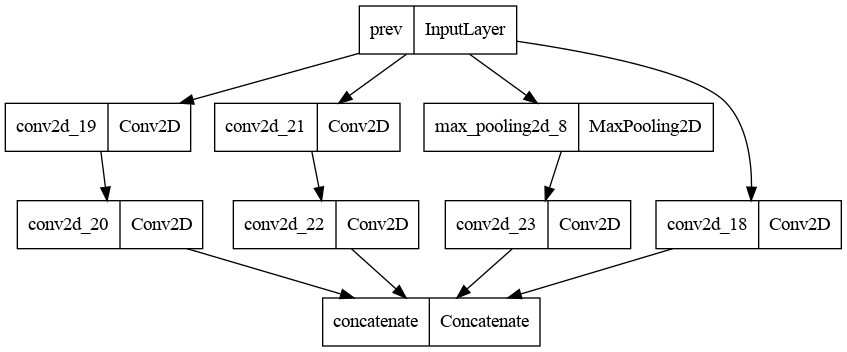

In [7]:
# Inception module summary and visualization
prev_layer = Input(shape=[28,28,256], name='prev')
output_layer = inception_module(prev_layer, 128, (64, 192), (64,96), 64)
inception = Model(prev_layer, output_layer)
inception.summary()
plot_model(inception)

In [8]:
# Naive Inception Module
def naive_inception_module(prev, n1, n2, n3):
    # n1개의 kernel(filter)을 가진 1x1 convolution layer
    o1 = Conv2D(filters=n1, kernel_size=(1,1), activation='relu')(prev)
    
    # n2개의 kernel(filter)을 가진 3x3 cconvolution layer
    o2 = Conv2D(filters=n2, kernel_size=(3,3), activation='relu', padding='same')(prev)
    
    # n3]개의 kernel(filter)을 가진 5x5 cconvolution layer
    o3 = Conv2D(filters=n3, kernel_size=(5,5), activation='relu', padding='same')(prev)
    
    # 3x3 poolsize, stride 1의 maxpooling layer
    o4 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(prev)
    
    # 4개 layer를 concatenate
    output = Concatenate()([o1, o2, o3, o4])

    return output

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 prev (InputLayer)              [(None, 28, 28, 256  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 28, 28, 128)  32896       ['prev[0][0]']                   
                                                                                                  
 conv2d_25 (Conv2D)             (None, 28, 28, 192)  442560      ['prev[0][0]']                   
                                                                                                  
 conv2d_26 (Conv2D)             (None, 28, 28, 96)   614496      ['prev[0][0]']             

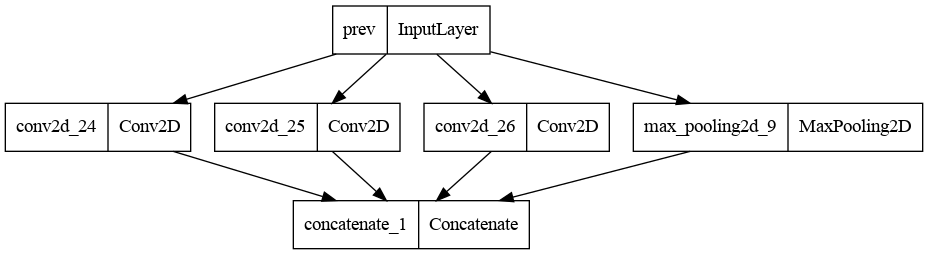

In [9]:
# Inception module summary and visualization
prev_layer = Input(shape=[28,28,256], name='prev')
output_layer = naive_inception_module(prev_layer, 128, 192, 96)
naive_inception = Model(prev_layer, output_layer)
naive_inception.summary()
plot_model(naive_inception)

### Inception module과 Naive Inception module간의 계산량 비교

In [10]:
# Inception Module
28*28*(64*1*1*256+64*1*1*256+128*1*1*256+192*3*3*64+96*5*5*64+64*1*1*256)

271351808

In [11]:
# Naive Inception Module
28*28*(128*1*1+192*3*3+96*5*5)*256

854196224